<a id='0'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 10px 25px;">Food Insecurity🖋📝 - EDA📚 & Data Analysis🎯 </p>

 ![Rorschach](https://onebowl.dk/wp-content/uploads/2019/07/food-insecurity-1920x960.png)

<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">1. Importing necessary modules and libraries📚</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import chi2_contingency #
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<a id='2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">2. Data Exploration🔍</p>

In [2]:
# reading dataset
data=pd.read_csv('food.xls',index_col="years", parse_dates=True)
data.head()

seq_id      ct10_id municipal           nhd   county     pop  \
years                                                                      
2015-01-01       1  25025110601    Boston  West Roxbury  Suffolk  2946.0   
2015-01-01       2  25025130100    Boston  West Roxbury  Suffolk  6517.0   
2015-01-01       3  25025130200    Boston  West Roxbury  Suffolk  5008.0   
2015-01-01       4  25025130300    Boston  West Roxbury  Suffolk  4680.0   
2015-01-01       5  25025130402    Boston  West Roxbury  Suffolk  4908.0   

            fi_p  unemp_p  pov_p       mhi  ...  homeown_p  fi_num  \
years                                       ...                      
2015-01-01  10.7      9.8    9.6   87426.0  ...       78.2   320.0   
2015-01-01   6.1      2.9    3.3   79844.0  ...       74.2   400.0   
2015-01-01   7.9      2.9    8.9  100952.0  ...       62.3   400.0   
2015-01-01   6.4      7.3    0.2  108472.0  ...       77.8   300.0   
2015-01-01   7.8      4.7    7.0   66394.0  ...       74.2   380.0   

            snapbelowp  snapabovep  cost_index  short_week  short_year  \
years                                                                    
2015-01-01        82.2        17.8       1.212       21.07    201000.0   
2015-01-01        82.2        17.8       1.212       21.07    254000.0   
2015-01-01        82.2        17.8       1.212       21.07    253000.0   
2015-01-01        82.2        17.8       1.212       21.07    191000.0   
2015-01-01        82.2        17.8       1.212       21.07    245000.0   

            weightcost  meal_gap  omad_goal  
years                                        
2015-01-01        3.56   56600.0    18900.0  
2015-01-01        3.56   71400.0    23800.0  
2015-01-01        3.56   71000.0    23700.0  
2015-01-01        3.56   53800.0    17900.0  
2015-01-01        3.56   68700.0    22900.0  

[5 rows x 22 columns]

## <p style="text-align:center;">Data Description</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2015-01-01 to 2015-01-01
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   seq_id      1090 non-null   int64  
 1   ct10_id     1090 non-null   int64  
 2   municipal   1090 non-null   object 
 3   nhd         169 non-null    object 
 4   county      1090 non-null   object 
 5   pop         1088 non-null   float64
 6   fi_p        1090 non-null   float64
 7   unemp_p     1090 non-null   float64
 8   pov_p       1090 non-null   float64
 9   mhi         1088 non-null   float64
 10  aa_p        1090 non-null   float64
 11  lat_p       1090 non-null   float64
 12  homeown_p   1090 non-null   float64
 13  fi_num      1088 non-null   float64
 14  snapbelowp  1090 non-null   float64
 15  snapabovep  1090 non-null   float64
 16  cost_index  1090 non-null   float64
 17  short_week  1090 non-null   float64
 18  short_year  1088 non-null   float64
 19  weightcos

### Observations
* From here my observations are only nhd,county,municipal are Objects and Sed_id,ct10_id and Years are integers other than these features all other features are floating values .        

In [4]:
data.describe()

seq_id       ct10_id          pop         fi_p      unemp_p  \
count  1090.000000  1.090000e+03  1088.000000  1090.000000  1090.000000   
mean    545.500000  2.501634e+10  4644.183824    11.676697     7.588899   
std     314.800201  7.393353e+06  1650.582214     6.469247     4.083164   
min       1.000000  2.500101e+10   420.000000     0.000000     0.000000   
25%     273.250000  2.500922e+10  3368.500000     7.200000     4.800000   
50%     545.500000  2.501735e+10  4547.000000    10.000000     6.800000   
75%     817.750000  2.502351e+10  5744.250000    14.500000     9.300000   
max    1090.000000  2.502598e+10  9440.000000    51.400000    34.700000   

             pov_p            mhi         aa_p        lat_p    homeown_p  \
count  1090.000000    1088.000000  1090.000000  1090.000000  1090.000000   
mean     12.080000   76627.317096     9.885413    10.729083    59.323670   
std      10.692439   33493.285579    15.368389    15.494427    25.571941   
min       0.000000   12142.000000     0.000000     0.000000     0.000000   
25%       4.400000   52601.750000     1.600000     2.000000    38.525000   
50%       8.100000   72988.000000     4.150000     4.850000    63.750000   
75%      16.600000   95209.000000    10.475000    11.700000    81.500000   
max      67.300000  217583.000000    93.600000    97.700000    99.200000   

            fi_num   snapbelowp   snapabovep   cost_index   short_week  \
count  1088.000000  1090.000000  1090.000000  1090.000000  1090.000000   
mean    518.226103    65.547431    34.452569     1.175458    20.426385   
std     307.211509    11.209925    11.209925     0.051002     0.888299   
min      10.000000    49.000000    17.800000     1.080000    18.770000   
25%     310.000000    57.700000    22.700000     1.138000    19.770000   
50%     450.000000    59.500000    40.500000     1.189000    20.660000   
75%     630.000000    77.300000    42.300000     1.211000    21.040000   
max    2090.000000    82.200000    51.000000     1.303000    22.650000   

         short_year   weightcost       meal_gap      omad_goal  
count  1.088000e+03  1090.000000    1088.000000    1088.000000  
mean   3.211507e+05     3.453312   92972.334559   30989.338235  
std    1.927312e+05     0.148554   55099.979357   18367.272110  
min    3.000000e+03     3.180000    1000.000000     300.000000  
25%    1.947500e+05     3.340000   55775.000000   18600.000000  
50%    2.795000e+05     3.490000   80700.000000   26900.000000  
75%    3.872500e+05     3.560000  113025.000000   37700.000000  
max    1.332000e+06     3.830000  374100.000000  124700.000000

In [5]:
#let's check null or missing values
data.isnull().sum()

seq_id          0
ct10_id         0
municipal       0
nhd           921
county          0
pop             2
fi_p            0
unemp_p         0
pov_p           0
mhi             2
aa_p            0
lat_p           0
homeown_p       0
fi_num          2
snapbelowp      0
snapabovep      0
cost_index      0
short_week      0
short_year      2
weightcost      0
meal_gap        2
omad_goal       2
dtype: int64

From here we can observe that there is null or missing values in this dataset and have to work on this 

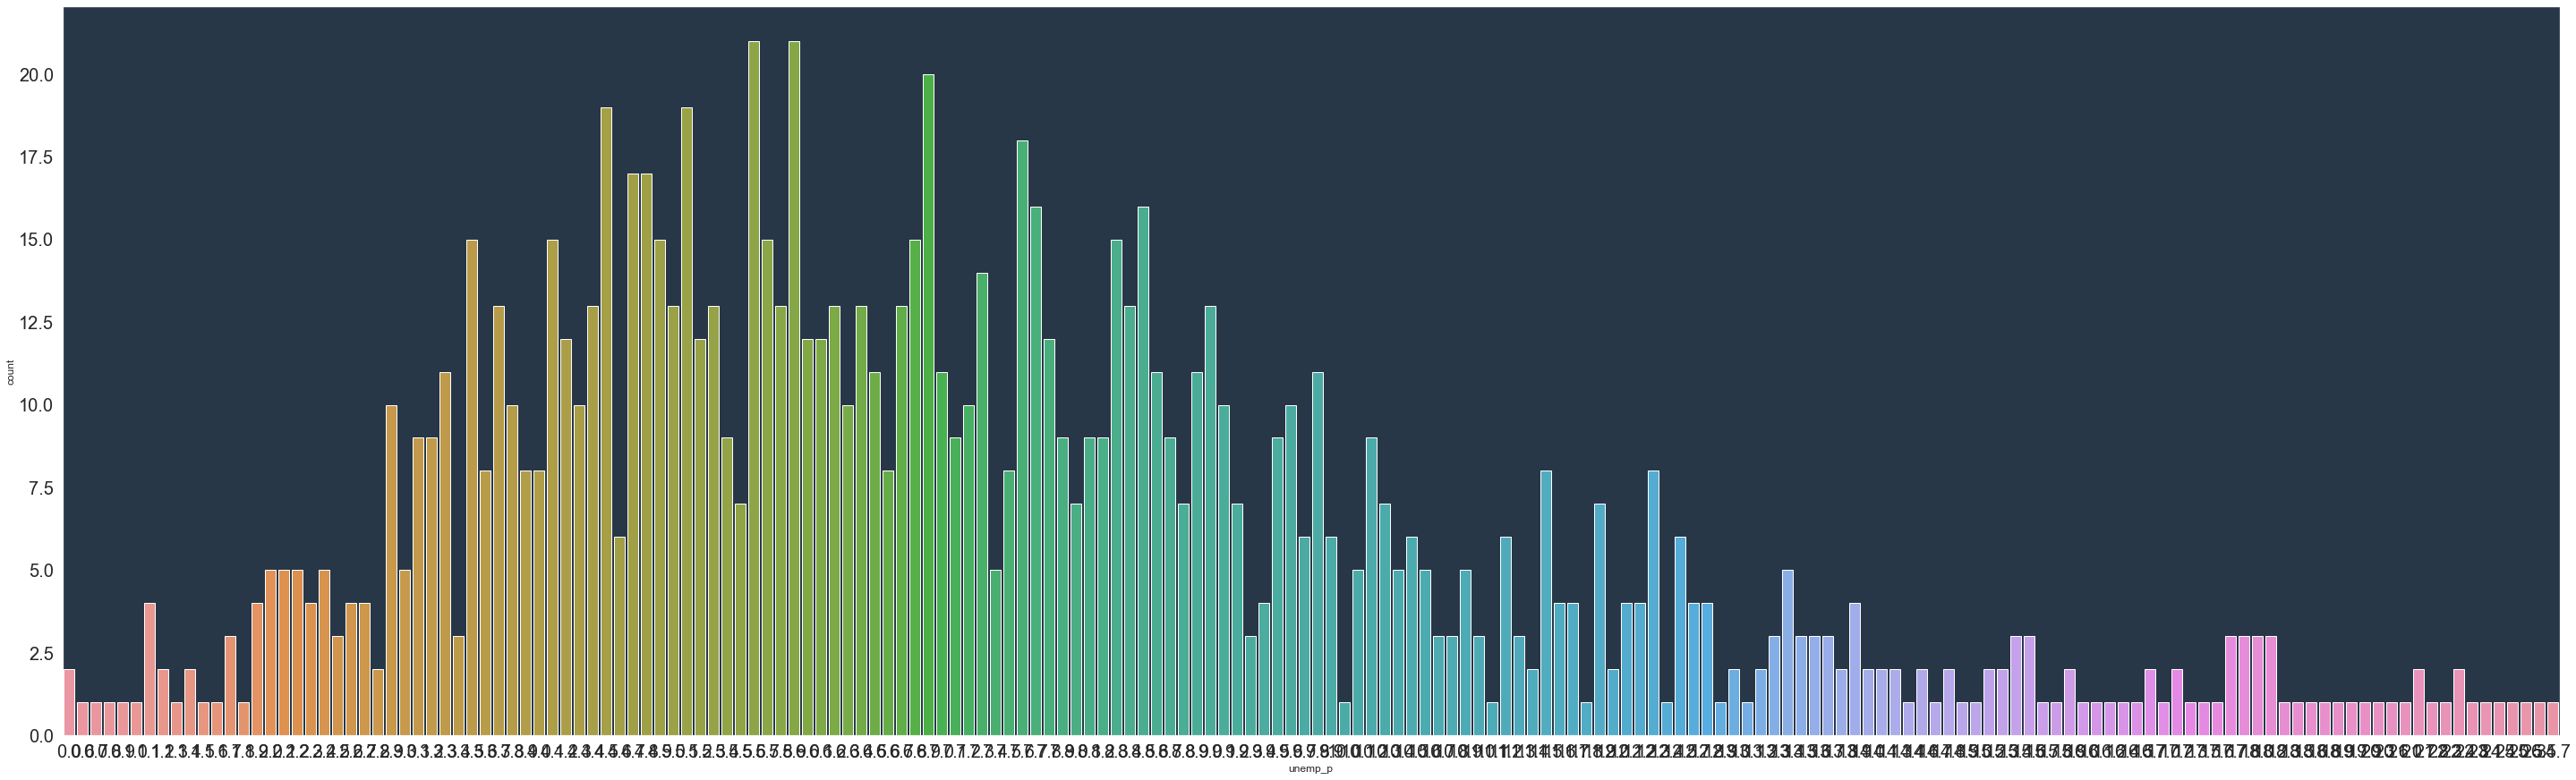

In [6]:
#count plot on the unemplyment rate
plt.figure(figsize=(50,15))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':20,'ytick.labelsize':20})
sns.countplot(x=data['unemp_p'])
plt.show()

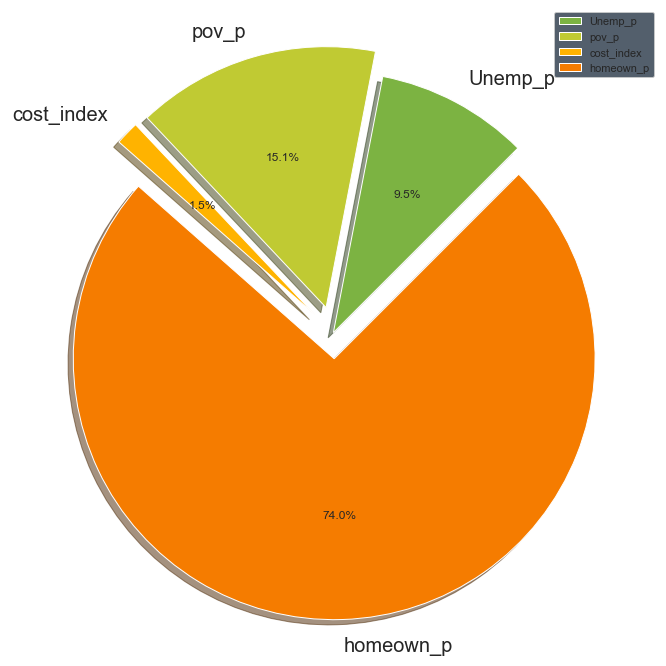

In [46]:
#piechart on the rate of unemployment, cost index, homeowned and poverty
plt.figure(figsize=(20,12))
tickets = [data['unemp_p'].mean(), data['pov_p'].mean(), data['cost_index'].mean(), data['homeown_p'].mean()]
label = ['Unemp_p' , 'pov_p', 'cost_index', 'homeown_p']
color = ['#7CB342','#C0CA33','#FFB300','#F57C00']
# explode = [0,0,0.1,0.1] will explode the 3rd & 4th slice
plt.pie (tickets , labels= label , colors= color , startangle=45 ,autopct='%1.1f%%', shadow='true', explode=[0,0.1 , 0.1 , 0.1])
plt.legend()
plt.show()

In [8]:
data.count

<bound method DataFrame.count of             seq_id      ct10_id  municipal           nhd     county     pop  \
years                                                                         
2015-01-01       1  25025110601     Boston  West Roxbury    Suffolk  2946.0   
2015-01-01       2  25025130100     Boston  West Roxbury    Suffolk  6517.0   
2015-01-01       3  25025130200     Boston  West Roxbury    Suffolk  5008.0   
2015-01-01       4  25025130300     Boston  West Roxbury    Suffolk  4680.0   
2015-01-01       5  25025130402     Boston  West Roxbury    Suffolk  4908.0   
...            ...          ...        ...           ...        ...     ...   
2015-01-01    1086  25019950400  Nantucket           NaN  Nantucket  2460.0   
2015-01-01    1087  25019950500  Nantucket           NaN  Nantucket  1141.0   
2015-01-01    1088  25025981100     Boston    Dorchester    Suffolk   596.0   
2015-01-01    1089  25005985500  Dartmouth           NaN    Bristol  5567.0   
2015-01-01    1090 

See here nhd contains missing values and all other features also has missing values.

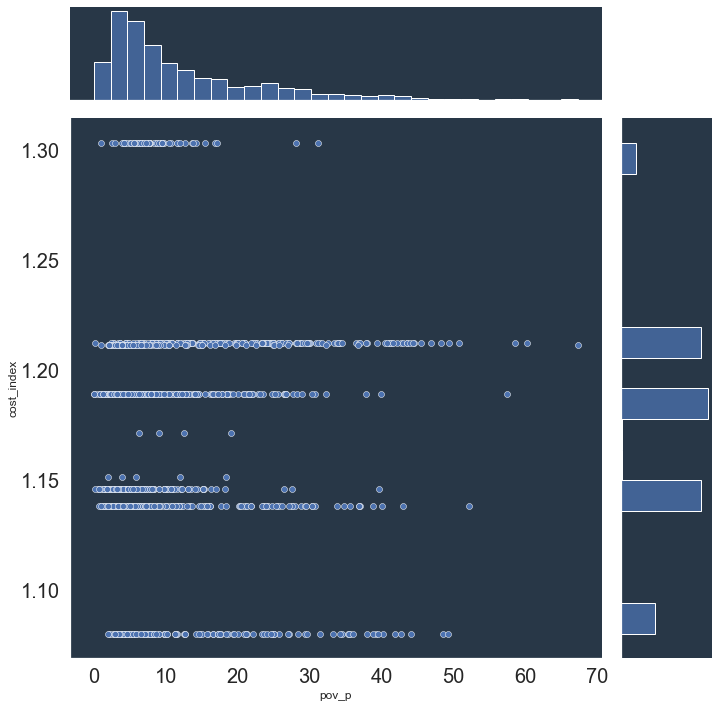

In [43]:
#rate of poverty versus the cost_index
sns.jointplot(x="pov_p", y="cost_index", data=data , height = 10)

In [11]:
#let's check dataset shape
data.shape

(1090, 22)

Here we have 1090 rows and 23 features it contains 

In [9]:
# split features into Categorical and Numerical from entire dataset
catogrical = [x for x in data.columns if data[x].dtype == "object"]
numeric = [x for x in data.columns if data[x].dtype == "float64" or data[x].dtype == "int64"]

In [10]:
# dealing with null values
#filling null or missing values with more frequent values
for i in catogrical:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [11]:
# filling null or missing values with mean or average 

for i in numeric:
    data[i].fillna(data[i].mean(), inplace = True)

In [12]:
#now let's check data once again 
data.isnull().sum()

seq_id        0
ct10_id       0
municipal     0
nhd           0
county        0
pop           0
fi_p          0
unemp_p       0
pov_p         0
mhi           0
aa_p          0
lat_p         0
homeown_p     0
fi_num        0
snapbelowp    0
snapabovep    0
cost_index    0
short_week    0
short_year    0
weightcost    0
meal_gap      0
omad_goal     0
dtype: int64

Perfect

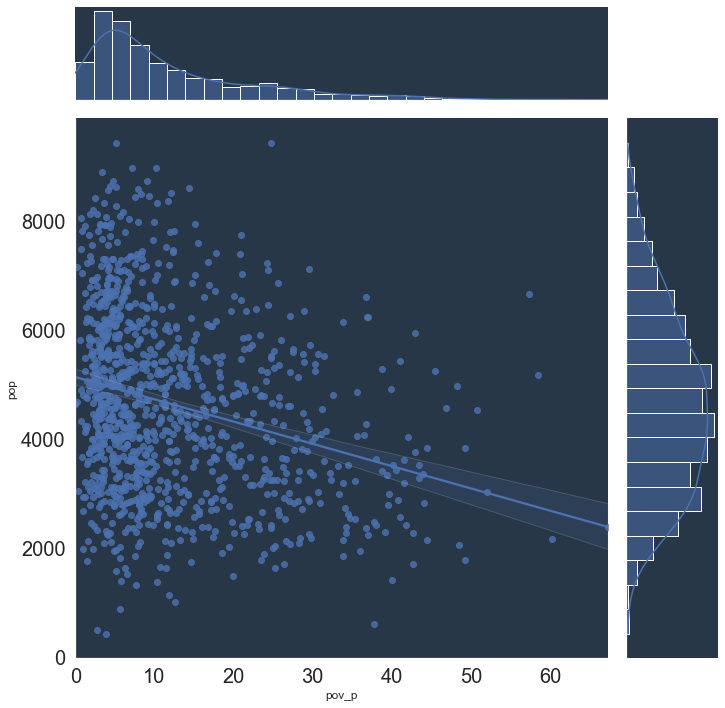

In [42]:
sns.jointplot(x="pov_p", y="pop", data=data , height = 10 , kind="reg")

It's cleaned now 

In [13]:
#descriptive statistics summary
data.describe()

seq_id       ct10_id          pop         fi_p      unemp_p  \
count  1090.000000  1.090000e+03  1090.000000  1090.000000  1090.000000   
mean    545.500000  2.501634e+10  4644.183824    11.676697     7.588899   
std     314.800201  7.393353e+06  1649.065832     6.469247     4.083164   
min       1.000000  2.500101e+10   420.000000     0.000000     0.000000   
25%     273.250000  2.500922e+10  3369.000000     7.200000     4.800000   
50%     545.500000  2.501735e+10  4553.000000    10.000000     6.800000   
75%     817.750000  2.502351e+10  5737.250000    14.500000     9.300000   
max    1090.000000  2.502598e+10  9440.000000    51.400000    34.700000   

             pov_p            mhi         aa_p        lat_p    homeown_p  \
count  1090.000000    1090.000000  1090.000000  1090.000000  1090.000000   
mean     12.080000   76627.317096     9.885413    10.729083    59.323670   
std      10.692439   33462.515443    15.368389    15.494427    25.571941   
min       0.000000   12142.000000     0.000000     0.000000     0.000000   
25%       4.400000   52705.500000     1.600000     2.000000    38.525000   
50%       8.100000   73010.500000     4.150000     4.850000    63.750000   
75%      16.600000   95178.250000    10.475000    11.700000    81.500000   
max      67.300000  217583.000000    93.600000    97.700000    99.200000   

            fi_num   snapbelowp   snapabovep   cost_index   short_week  \
count  1090.000000  1090.000000  1090.000000  1090.000000  1090.000000   
mean    518.226103    65.547431    34.452569     1.175458    20.426385   
std     306.929275    11.209925    11.209925     0.051002     0.888299   
min      10.000000    49.000000    17.800000     1.080000    18.770000   
25%     310.000000    57.700000    22.700000     1.138000    19.770000   
50%     450.000000    59.500000    40.500000     1.189000    20.660000   
75%     630.000000    77.300000    42.300000     1.211000    21.040000   
max    2090.000000    82.200000    51.000000     1.303000    22.650000   

         short_year   weightcost       meal_gap      omad_goal  
count  1.090000e+03  1090.000000    1090.000000    1090.000000  
mean   3.211507e+05     3.453312   92972.334559   30989.338235  
std    1.925541e+05     0.148554   55049.359246   18350.398177  
min    3.000000e+03     3.180000    1000.000000     300.000000  
25%    1.950000e+05     3.340000   55850.000000   18625.000000  
50%    2.800000e+05     3.490000   80950.000000   27000.000000  
75%    3.870000e+05     3.560000  112975.000000   37675.000000  
max    1.332000e+06     3.830000  374100.000000  124700.000000

In [14]:
data.columns

Index(['seq_id', 'ct10_id', 'municipal', 'nhd', 'county', 'pop', 'fi_p',
       'unemp_p', 'pov_p', 'mhi', 'aa_p', 'lat_p', 'homeown_p', 'fi_num',
       'snapbelowp', 'snapabovep', 'cost_index', 'short_week', 'short_year',
       'weightcost', 'meal_gap', 'omad_goal'],
      dtype='object')

In [16]:
#let's count county to know county distribution
data['county'].value_counts()

Middlesex     317
Suffolk       192
Essex         162
Norfolk       130
Bristol       125
Plymouth       99
Barnstable     56
Nantucket       5
Dukes           4
Name: county, dtype: int64

In [17]:
#describing catogrical variables
data[catogrical ].describe()

municipal         nhd     county
count       1090        1090       1090
unique       194          21          9
top       Boston  Dorchester  Middlesex
freq         169         948        317

In [18]:
#describing numerical variables
data[numeric ].describe()

seq_id       ct10_id          pop         fi_p      unemp_p  \
count  1090.000000  1.090000e+03  1090.000000  1090.000000  1090.000000   
mean    545.500000  2.501634e+10  4644.183824    11.676697     7.588899   
std     314.800201  7.393353e+06  1649.065832     6.469247     4.083164   
min       1.000000  2.500101e+10   420.000000     0.000000     0.000000   
25%     273.250000  2.500922e+10  3369.000000     7.200000     4.800000   
50%     545.500000  2.501735e+10  4553.000000    10.000000     6.800000   
75%     817.750000  2.502351e+10  5737.250000    14.500000     9.300000   
max    1090.000000  2.502598e+10  9440.000000    51.400000    34.700000   

             pov_p            mhi         aa_p        lat_p    homeown_p  \
count  1090.000000    1090.000000  1090.000000  1090.000000  1090.000000   
mean     12.080000   76627.317096     9.885413    10.729083    59.323670   
std      10.692439   33462.515443    15.368389    15.494427    25.571941   
min       0.000000   12142.000000     0.000000     0.000000     0.000000   
25%       4.400000   52705.500000     1.600000     2.000000    38.525000   
50%       8.100000   73010.500000     4.150000     4.850000    63.750000   
75%      16.600000   95178.250000    10.475000    11.700000    81.500000   
max      67.300000  217583.000000    93.600000    97.700000    99.200000   

            fi_num   snapbelowp   snapabovep   cost_index   short_week  \
count  1090.000000  1090.000000  1090.000000  1090.000000  1090.000000   
mean    518.226103    65.547431    34.452569     1.175458    20.426385   
std     306.929275    11.209925    11.209925     0.051002     0.888299   
min      10.000000    49.000000    17.800000     1.080000    18.770000   
25%     310.000000    57.700000    22.700000     1.138000    19.770000   
50%     450.000000    59.500000    40.500000     1.189000    20.660000   
75%     630.000000    77.300000    42.300000     1.211000    21.040000   
max    2090.000000    82.200000    51.000000     1.303000    22.650000   

         short_year   weightcost       meal_gap      omad_goal  
count  1.090000e+03  1090.000000    1090.000000    1090.000000  
mean   3.211507e+05     3.453312   92972.334559   30989.338235  
std    1.925541e+05     0.148554   55049.359246   18350.398177  
min    3.000000e+03     3.180000    1000.000000     300.000000  
25%    1.950000e+05     3.340000   55850.000000   18625.000000  
50%    2.800000e+05     3.490000   80950.000000   27000.000000  
75%    3.870000e+05     3.560000  112975.000000   37675.000000  
max    1.332000e+06     3.830000  374100.000000  124700.000000

<a id='4'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">4. Data Vizualization🎨</p>

Text(0.5, 1.0, 'Count for County')

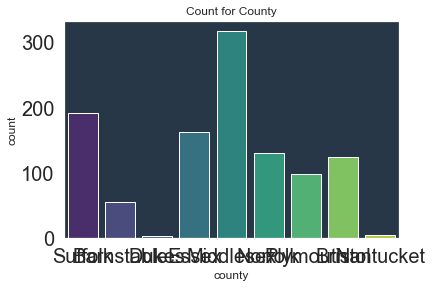

In [19]:
# let's visualize count for county

sns.countplot(data['county'],palette='viridis')
plt.title("Count for County")

<AxesSubplot:xlabel='pov_p'>

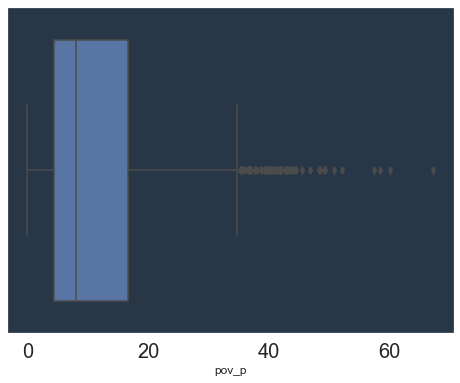

In [20]:
#box plot on poverty rate
plt.figure(figsize=(8,6))
sns.boxplot(data.pov_p)

In [21]:
data['municipal'].value_counts()

Boston            169
Cambridge          32
New Bedford        31
Lowell             25
Fall River         25
                 ... 
Beverly; Salem      1
Truro               1
Berkley             1
Ayer; Shirley       1
Rowley              1
Name: municipal, Length: 194, dtype: int64

In [22]:
data.columns

Index(['seq_id', 'ct10_id', 'municipal', 'nhd', 'county', 'pop', 'fi_p',
       'unemp_p', 'pov_p', 'mhi', 'aa_p', 'lat_p', 'homeown_p', 'fi_num',
       'snapbelowp', 'snapabovep', 'cost_index', 'short_week', 'short_year',
       'weightcost', 'meal_gap', 'omad_goal'],
      dtype='object')

<AxesSubplot:>

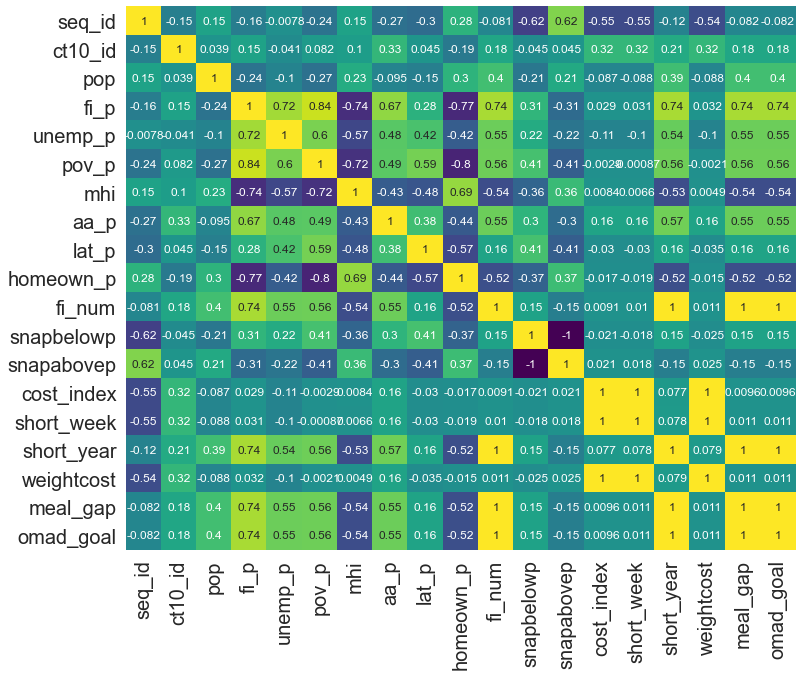

In [23]:
#heatmap on the data corellated values
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),cmap='viridis',annot=True,cbar=False)

In [24]:
dfcor=data.corr()
dfcor

seq_id   ct10_id       pop      fi_p   unemp_p     pov_p  \
seq_id      1.000000 -0.146964  0.151624 -0.157287 -0.007763 -0.237522   
ct10_id    -0.146964  1.000000  0.038794  0.154329 -0.041039  0.081996   
pop         0.151624  0.038794  1.000000 -0.235293 -0.103088 -0.265390   
fi_p       -0.157287  0.154329 -0.235293  1.000000  0.724076  0.837781   
unemp_p    -0.007763 -0.041039 -0.103088  0.724076  1.000000  0.598452   
pov_p      -0.237522  0.081996 -0.265390  0.837781  0.598452  1.000000   
mhi         0.153131  0.103487  0.233529 -0.736007 -0.570465 -0.715087   
aa_p       -0.265162  0.325346 -0.094654  0.667194  0.478395  0.485808   
lat_p      -0.300377  0.044524 -0.147546  0.280983  0.422133  0.585823   
homeown_p   0.282952 -0.191975  0.296577 -0.765856 -0.421026 -0.804286   
fi_num     -0.081192  0.180325  0.395936  0.736331  0.550468  0.556038   
snapbelowp -0.618399 -0.045135 -0.209083  0.311297  0.220631  0.407633   
snapabovep  0.618399  0.045135  0.209083 -0.311297 -0.220631 -0.407633   
cost_index -0.547869  0.322809 -0.087134  0.029006 -0.105835 -0.002866   
short_week -0.549305  0.322781 -0.088447  0.031077 -0.104776 -0.000867   
short_year -0.122948  0.211194  0.387683  0.736417  0.538942  0.555305   
weightcost -0.538623  0.320698 -0.088299  0.032267 -0.102353 -0.002141   
meal_gap   -0.082206  0.180701  0.396122  0.736273  0.550090  0.556069   
omad_goal  -0.082260  0.180681  0.396168  0.736213  0.549997  0.556015   

                 mhi      aa_p     lat_p  homeown_p    fi_num  snapbelowp  \
seq_id      0.153131 -0.265162 -0.300377   0.282952 -0.081192   -0.618399   
ct10_id     0.103487  0.325346  0.044524  -0.191975  0.180325   -0.045135   
pop         0.233529 -0.094654 -0.147546   0.296577  0.395936   -0.209083   
fi_p       -0.736007  0.667194  0.280983  -0.765856  0.736331    0.311297   
unemp_p    -0.570465  0.478395  0.422133  -0.421026  0.550468    0.220631   
pov_p      -0.715087  0.485808  0.585823  -0.804286  0.556038    0.407633   
mhi         1.000000 -0.429441 -0.476283   0.686803 -0.537535   -0.356107   
aa_p       -0.429441  1.000000  0.382920  -0.440801  0.550423    0.302650   
lat_p      -0.476283  0.382920  1.000000  -0.568701  0.158853    0.406747   
homeown_p   0.686803 -0.440801 -0.568701   1.000000 -0.521985   -0.373426   
fi_num     -0.537535  0.550423  0.158853  -0.521985  1.000000    0.150722   
snapbelowp -0.356107  0.302650  0.406747  -0.373426  0.150722    1.000000   
snapabovep  0.356107 -0.302650 -0.406747   0.373426 -0.150722   -1.000000   
cost_index  0.008379  0.160528 -0.030433  -0.016706  0.009067   -0.021376   
short_week  0.006643  0.162101 -0.029515  -0.018610  0.010081   -0.018341   
short_year -0.531474  0.567235  0.157619  -0.520553  0.996985    0.153805   
weightcost  0.004900  0.161329 -0.034843  -0.014577  0.010808   -0.025188   
meal_gap   -0.537145  0.550353  0.158667  -0.522056  0.999953    0.151197   
omad_goal  -0.537150  0.550322  0.158636  -0.522017  0.999952    0.151187   

            snapabovep  cost_index  short_week  short_year  weightcost  \
seq_id        0.618399   -0.547869   -0.549305   -0.122948   -0.538623   
ct10_id       0.045135    0.322809    0.322781    0.211194    0.320698   
pop           0.209083   -0.087134   -0.088447    0.387683   -0.088299   
fi_p         -0.311297    0.029006    0.031077    0.736417    0.032267   
unemp_p      -0.220631   -0.105835   -0.104776    0.538942   -0.102353   
pov_p        -0.407633   -0.002866   -0.000867    0.555305   -0.002141   
mhi           0.356107    0.008379    0.006643   -0.531474    0.004900   
aa_p         -0.302650    0.160528    0.162101    0.567235    0.161329   
lat_p        -0.406747   -0.030433   -0.029515    0.157619   -0.034843   
homeown_p     0.373426   -0.016706   -0.018610   -0.520553   -0.014577   
fi_num       -0.150722    0.009067    0.010081    0.996985    0.010808   
snapbelowp   -1.000000   -0.021376   -0.018341    0.153805   -0.025188   
snapabovep    1.000000    0.02

In [25]:
data.head()

seq_id      ct10_id municipal           nhd   county     pop  \
years                                                                      
2015-01-01       1  25025110601    Boston  West Roxbury  Suffolk  2946.0   
2015-01-01       2  25025130100    Boston  West Roxbury  Suffolk  6517.0   
2015-01-01       3  25025130200    Boston  West Roxbury  Suffolk  5008.0   
2015-01-01       4  25025130300    Boston  West Roxbury  Suffolk  4680.0   
2015-01-01       5  25025130402    Boston  West Roxbury  Suffolk  4908.0   

            fi_p  unemp_p  pov_p       mhi  ...  homeown_p  fi_num  \
years                                       ...                      
2015-01-01  10.7      9.8    9.6   87426.0  ...       78.2   320.0   
2015-01-01   6.1      2.9    3.3   79844.0  ...       74.2   400.0   
2015-01-01   7.9      2.9    8.9  100952.0  ...       62.3   400.0   
2015-01-01   6.4      7.3    0.2  108472.0  ...       77.8   300.0   
2015-01-01   7.8      4.7    7.0   66394.0  ...       74.2   380.0   

            snapbelowp  snapabovep  cost_index  short_week  short_year  \
years                                                                    
2015-01-01        82.2        17.8       1.212       21.07    201000.0   
2015-01-01        82.2        17.8       1.212       21.07    254000.0   
2015-01-01        82.2        17.8       1.212       21.07    253000.0   
2015-01-01        82.2        17.8       1.212       21.07    191000.0   
2015-01-01        82.2        17.8       1.212       21.07    245000.0   

            weightcost  meal_gap  omad_goal  
years                                        
2015-01-01        3.56   56600.0    18900.0  
2015-01-01        3.56   71400.0    23800.0  
2015-01-01        3.56   71000.0    23700.0  
2015-01-01        3.56   53800.0    17900.0  
2015-01-01        3.56   68700.0    22900.0  

[5 rows x 22 columns]

Text(0, 0.5, 'count')

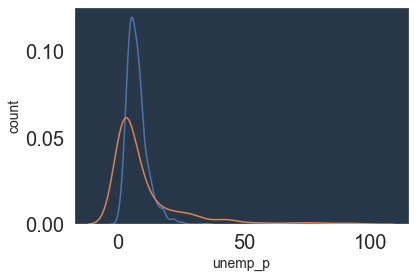

In [26]:
#plot on unemplyment and poverty
sns.kdeplot(data["unemp_p"],label="unemp_p")
sns.kdeplot(data["lat_p"],label="lat_p")
plt.xlabel("unemp_p", fontsize=14)
plt.ylabel('count', fontsize=14)

## Que 1: Factor contribut the food insecurity

* below's are  factors contribut food insecurity because they are linearly related means one increase with other also
* fi_p,unemp_p,pov_p,meal_gap,omad_goal 
* Graph 1 to  4 as evidence of this Factor

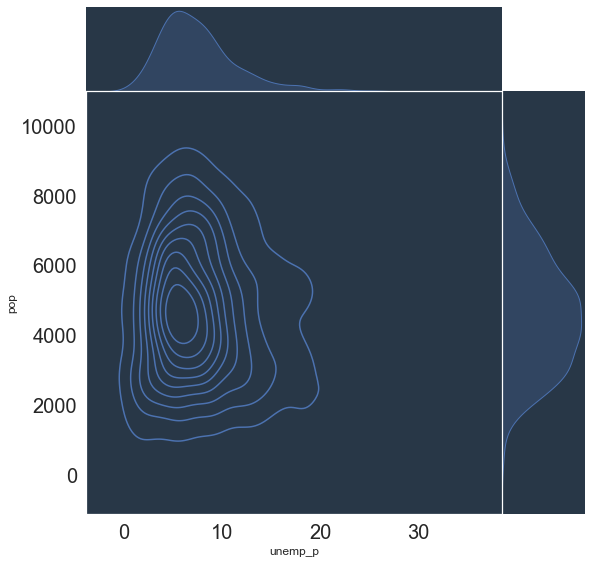

In [41]:
# Remove the space between the joint and marginal axes and for futher analysis on the unemployment rate and population
g = sns.JointGrid(x="unemp_p", y="pop", data=data, height = 8 , space =0)
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)

<Figure size 1008x1152 with 0 Axes>

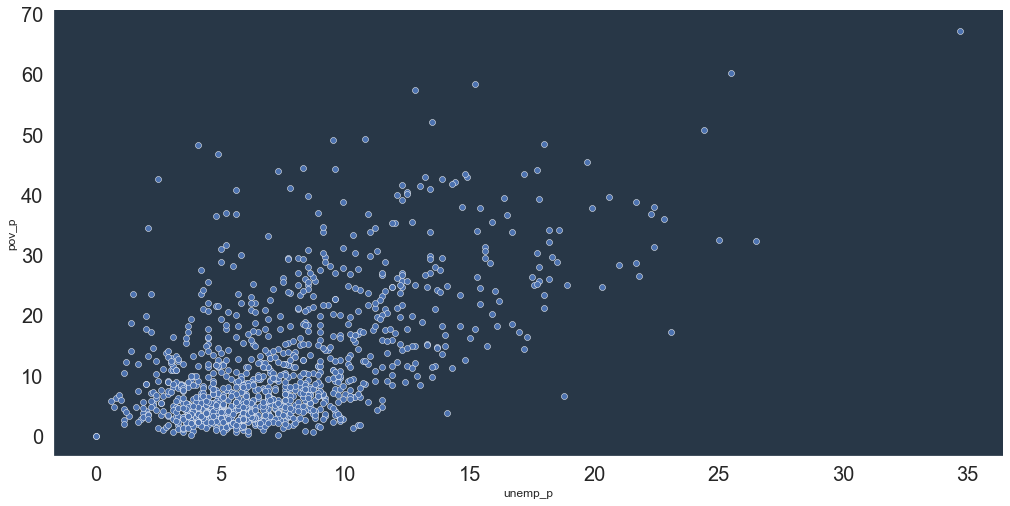

In [24]:
# Drawing scatter plot using relplot to check relation between the unemplyment rate and poverty
plt.figure(figsize=(14,16))
sns.relplot(x="unemp_p" , y="pov_p", data=data , height=7 , aspect=2)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='omad_goal', ylabel='meal_gap'>

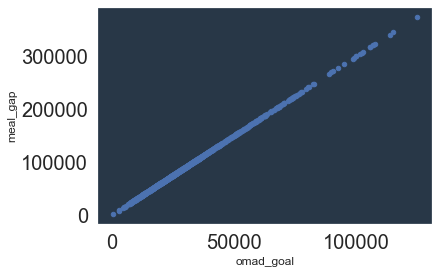

In [28]:
data.plot.scatter('omad_goal','meal_gap')

### Que 2:Biggest Factor That impact food security

# short_year(may not consider),meal_gap,omad_goal are the biggest factor of **food security. **
* Explanation is the mean of correlation give the value of important factors which shows below that is
 * short_year(but i think its not acceptable) 2.meal_gap 3.omad_goal 
* other Evidence of it correlation graph #4(above graph)

In [29]:
mean_of_dfcorr=dfcor.mean()
mean_of_dfcorr

seq_id       -0.080620
ct10_id       0.162510
pop           0.115083
fi_p          0.253026
unemp_p       0.208221
pov_p         0.199217
mhi          -0.151248
aa_p          0.253258
lat_p         0.092761
homeown_p    -0.161201
fi_num        0.316553
snapbelowp    0.030990
snapabovep   -0.030990
cost_index    0.149227
short_week    0.149505
short_year    0.326599
weightcost    0.150017
meal_gap      0.316600
omad_goal     0.316590
dtype: float64

In [30]:
mean_of_dfcorr.max()

0.3265993442697101

<AxesSubplot:>

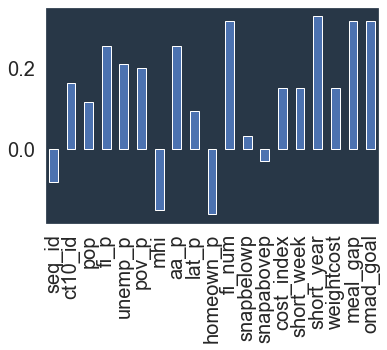

In [31]:
#bar plot on to demonstrate the mean_of_dfcorr  that is the mean correlation
mean_of_dfcorr.plot.bar()

## Que3: • Are high food costs and food insecurity related?

* cost index(index related to cost of food) and 
* meal gap(how much pepoles are not get meal) 
   1.  There no such a great realation ship between them (as you see below relation 0.0095 means only 0.95%) and 
   2. its visualizing evidence is graph no 5 which show no relationship between them

In [32]:
MealGap_CostIndex=data[['meal_gap','cost_index']]
MealGap_CostIndex

meal_gap  cost_index
years                           
2015-01-01   56600.0       1.212
2015-01-01   71400.0       1.212
2015-01-01   71000.0       1.212
2015-01-01   53800.0       1.212
2015-01-01   68700.0       1.212
...              ...         ...
2015-01-01   15900.0       1.151
2015-01-01   15800.0       1.151
2015-01-01   34800.0       1.212
2015-01-01   98700.0       1.080
2015-01-01   61300.0       1.080

[1090 rows x 2 columns]

In [33]:
MealGap_CostIndex.corr()

meal_gap  cost_index
meal_gap    1.000000    0.009591
cost_index  0.009591    1.000000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='meal_gap', ylabel='cost_index'>

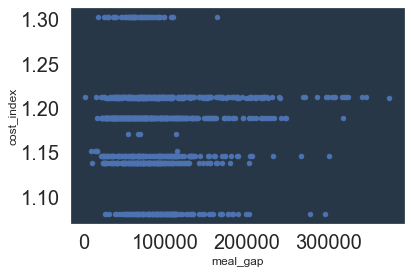

In [34]:
MealGap_CostIndex.plot.scatter('meal_gap','cost_index')

## • Which neighborhoods are highly affected?

* this data we calculate by using feilds contry and meal gap the higher meal gap means highely affected countries
     1.  Most afftected contries are 1.Suffolk 2.Plymouth 3.Norfolk 4.Nantucket (Evidence is 'Most_affected' conatin )


In [35]:
HighelyAffectedNei=data[['county','meal_gap']]
HighelyAffectedNei

county  meal_gap
years                          
2015-01-01    Suffolk   56600.0
2015-01-01    Suffolk   71400.0
2015-01-01    Suffolk   71000.0
2015-01-01    Suffolk   53800.0
2015-01-01    Suffolk   68700.0
...               ...       ...
2015-01-01  Nantucket   15900.0
2015-01-01  Nantucket   15800.0
2015-01-01    Suffolk   34800.0
2015-01-01    Bristol   98700.0
2015-01-01    Bristol   61300.0

[1090 rows x 2 columns]

In [36]:
A=HighelyAffectedNei.groupby('county').mean()
A

meal_gap
county                   
Barnstable   65935.714286
Bristol      99480.000000
Dukes        75225.000000
Essex        78391.975309
Middlesex    85282.475297
Nantucket    33320.000000
Norfolk      90297.692308
Plymouth     97301.010101
Suffolk     123121.875000

In [37]:
Most_affected=A.sort_values(by='county', ascending=False)
Most_affected

meal_gap
county                   
Suffolk     123121.875000
Plymouth     97301.010101
Norfolk      90297.692308
Nantucket    33320.000000
Middlesex    85282.475297
Essex        78391.975309
Dukes        75225.000000
Bristol      99480.000000
Barnstable   65935.714286

* most affected (above shows the highelly affected countries in descending order) country is Suffolk


<AxesSubplot:xlabel='county'>

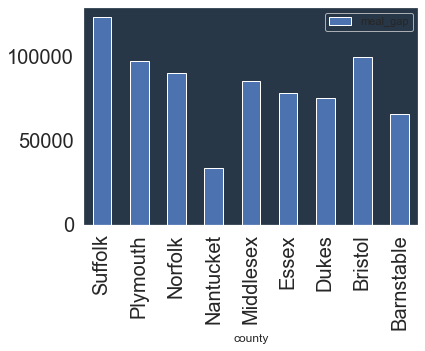

In [38]:
Most_affected.plot.bar()

In [39]:

### zet test###
points = data['unemp_p']
mu = points.mean()
sigma = points.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

mu:  7.588899082568808 , sigma: 4.0812904595855155


In [40]:
z_critical = 1.96 
x_bar = 90.2
N = 10
SE = sigma/np.sqrt(N)
z_test = (x_bar - mu)/SE
print(z_test)

64.00897988026045


In [48]:
# zet test for poverty
points = data['pov_p']
mu = points.mean()
sigma = points.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

mu:  12.08 , sigma: 10.687532992598895


In [49]:
z_critical = 1.96 
x_bar = 90.2
N = 10
SE = sigma/np.sqrt(N)
z_test = (x_bar - mu)/SE
print(z_test)

23.114513984043537


In [50]:
#T test 
x = data['unemp_p']
mu = 10
t_critical = 2.093
x_bar = np.array(x).mean()
s = np.array(x).std(ddof=1) # 
N = len(x)
SE = s/np.sqrt(N)
t = (x_bar - mu)/SE
print("t-statistic: ",t)

# a one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, mu)
print("t = ", t, ", p = ", p)

t-statistic:  -19.49538535988195
t =  -19.495385359881947 , p =  7.63517925057037e-73


In [51]:
# T-test on poverty data
x = data['pov_p']
mu = 10
t_critical = 2.093
x_bar = np.array(x).mean()
s = np.array(x).std(ddof=1) 
N = len(x)
SE = s/np.sqrt(N)
t = (x_bar - mu)/SE
print("t-statistic: ",t)

# a one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, mu)
print("t = ", t, ", p = ", p)

t-statistic:  6.422436314117872
t =  6.422436314117872 , p =  1.9994653224850458e-10


In [57]:
#chi-test ######
contigency= pd.crosstab(data['unemp_p'], data['pov_p'])

In [59]:
c, p, dof, expected = chi2_contingency(contigency)
c

81913.25200946085